<h1>Gradient descent</h1>

In [92]:
import numpy as np
import matplotlib.pyplot as plt

In [93]:
def GD(f, grad_f, x0, alpha, kmax, tolf, tolx, x_true):
    xold = x0
    k=0
    conditions = True
    
    x_values = []  # Store x_k values
    f_values = []  # Store f(x_k) values
    grad_values = []  # Store grad_f(x_k) values
    errA_values = []  # Store ||grad_f(x_k)||_2 values
    errR_values = []  # Store ||xk-xtrue||_2 values
    
    while conditions:
        x = xold - alpha * grad_f(xold)

        x_values.append(x)
        f_values.append(f(x))
        grad_values.append(grad_f(x))
        errA_values.append(np.linalg.norm(grad_f(x), 2))
        errR_values.append(np.linalg.norm(x - x_true, 2))
        
        condition1 = np.linalg.norm(grad_f(x)) > tolf*np.linalg.norm(grad_f(x0))
        condition2 =  np.linalg.norm(x-xold) > tolx
        condition3 = k < kmax
        conditions = condition1 & condition2 & condition3
        k +=1
        xold = x
    return x_values, k, f_values, grad_values, errA_values, errR_values

def backtracking(f, grad_f, x):
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-5:
            break
    return alpha
    
def GD_backtracking(f, grad_f, x0, kmax, tolf, tolx, x_true):
    xold = x0
    k = 0
    conditions = True

    x_values = []  # Store x_k values
    f_values = []  # Store f(x_k) values
    grad_values = []  # Store grad_f(x_k) values
    errA_values = []  # Store ||grad_f(x_k)||_2 values
    errR_values = []  # Store ||xk-xtrue||_2 values
    
    while conditions:
        alpha = backtracking(f, grad_f, xold)
        x = xold - alpha * grad_f(xold)
        
        x_values.append(x)
        f_values.append(f(x))
        grad_values.append(grad_f(x))
        errA_values.append(np.linalg.norm(grad_f(x), 2))
        errR_values.append(np.linalg.norm(x - x_true, 2))
        
        condition1 = np.linalg.norm(grad_f(x), 2) > tolf * np.linalg.norm(grad_f(x0), 2)
        condition2 = np.linalg.norm(x-xold, 2) > tolx
        condition3 = k < kmax
        conditions = condition1 and condition2 and condition3
        k +=1
        xold = x
    return x_values, k, f_values, grad_values, errA_values, errR_values

In [94]:
def plt_contour(xk_vals, k, f_vals, grad_valks, err_vals, f, title):
    xv = np.linspace(-10, 10, 100).T
    yv = np.linspace(-10, 10, 100).T

    xx,yy = np.meshgrid(xv, yv)
    
    zz = f([xx, yy])

    xk_vals = np.array(xk_vals)
    
    plt.plot(xk_vals[:,0], xk_vals[:,1], '--go')

    plt.contour(xx, yy, zz)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid()

Alpha: 0.1, Iteration: 92, Solution: [3. 1.], Error: 1.2141680327815152e-09
Alpha: 0.01, Iteration: 891, Solution: [2.99999995 0.99999998], Error: 1.5220658089454274e-08
Alpha: 0.001, Iteration: 1001, Solution: [2.59561682 0.86520561], Error: 0.13479439340178992


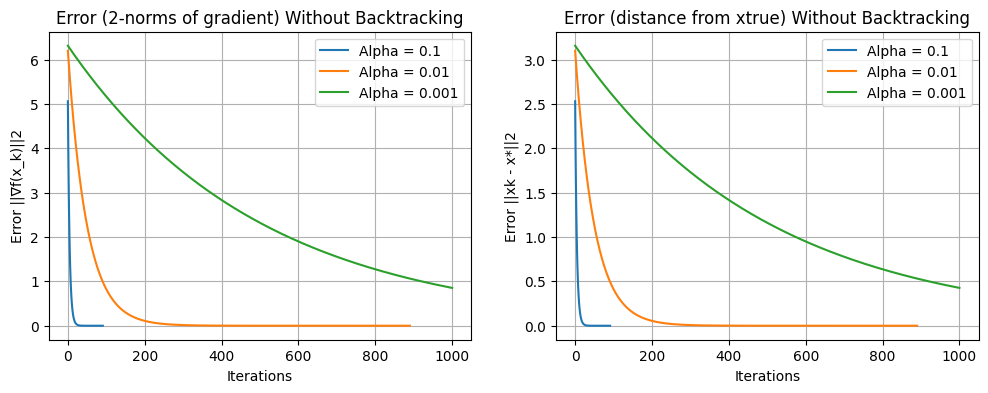


Iteration: 150, Solution: [2.99999999 1.        ], Error: 2.0008196544019086e-09


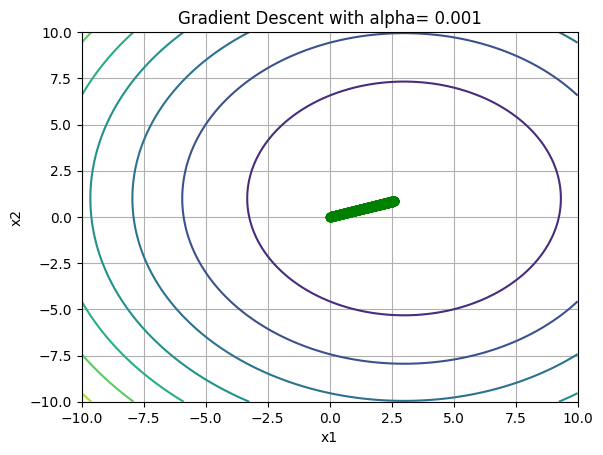

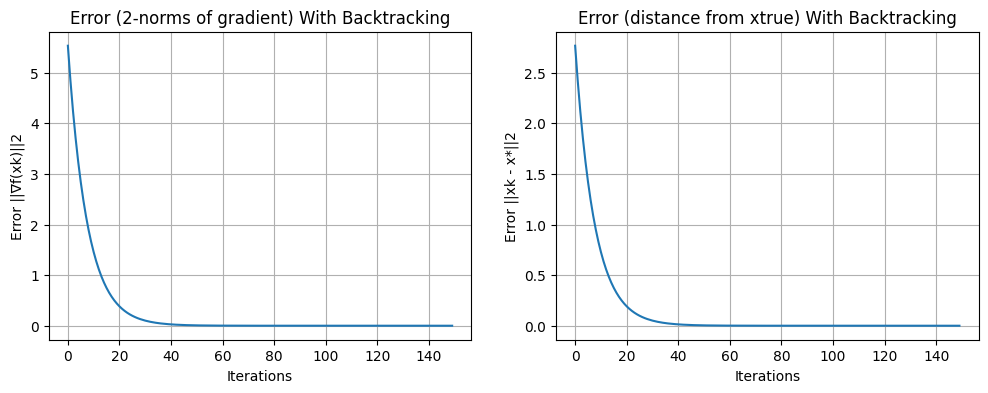

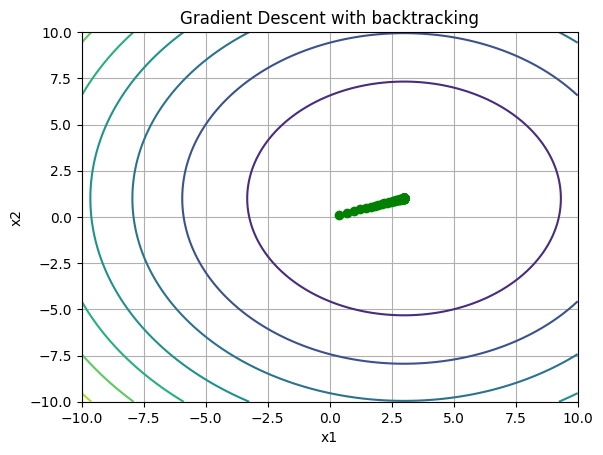

In [95]:
#FUNCTION 1
def f(x):
    x1 = x[0]
    x2 = x[1]
    return (x1-3)**2 + (x2-1)**2

def grad_f(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([2*(x1-3), 2*(x2-1)])

x0 = np.array([0, 0])
kmax = 1000 #try 100 and 1000
tolf = tolx = 1e-9
x_true = np.array([3, 1])

plt.figure(figsize=(12, 4))

#Without backtracking
for alpha in [0.1, 0.01, 0.001]:
    x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD(f, grad_f, x0, alpha, kmax, tolf, tolx, x_true)
    error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
    print(f"Alpha: {alpha}, Iteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")

    plt.subplot(1, 2, 1)
    plt.plot(range(k), errA_values, label=f"Alpha = {alpha}")
    plt.xlabel("Iterations")
    plt.ylabel("Error ||∇f(x_k)||2")
    plt.legend()
    plt.title("Error (2-norms of gradient) Without Backtracking")
    plt.grid(True)
     
    plt.subplot(1, 2, 2)   
    plt.plot(range(k), errR_values, label=f"Alpha = {alpha}") # plot the error ||xk − x_true||2 varying k when the true x_true is available
    plt.xlabel("Iterations")
    plt.ylabel("Error ||xk - x*||2")
    plt.title("Error (distance from xtrue) Without Backtracking")
    plt.legend()
    plt.grid(True)

plt.show()

plt_contour(x_sol_values, k, f_values, grad_values, errA_values, f, "Gradient Descent with alpha= " + str(alpha))

#With backtracking
x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD_backtracking(f, grad_f, x0, kmax, tolf, tolx, x_true)
error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
print(f"\nIteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(k), errA_values)
plt.xlabel("Iterations")
plt.ylabel("Error ||∇f(xk)||2")
plt.title("Error (2-norms of gradient) With Backtracking")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(k), errR_values) # plot the error ||xk − x_true||2 varying k when the true x_true is available
plt.xlabel("Iterations")
plt.ylabel("Error ||xk - x*||2")
plt.title("Error (distance from xtrue) With Backtracking")
plt.grid(True)

plt.show()

plt_contour(x_sol_values, k, f_values, grad_values, errA_values, f, "Gradient Descent with backtracking")

Alpha: 0.09, Iteration: 97, Solution: [1.         1.99999999], Error: 3.907862671338874e-09
Alpha: 0.01, Iteration: 868, Solution: [1.         1.99999995], Error: 2.16659974692721e-08
Alpha: 0.001, Iteration: 1001, Solution: [1.         1.73041121], Error: 0.12056377065290141


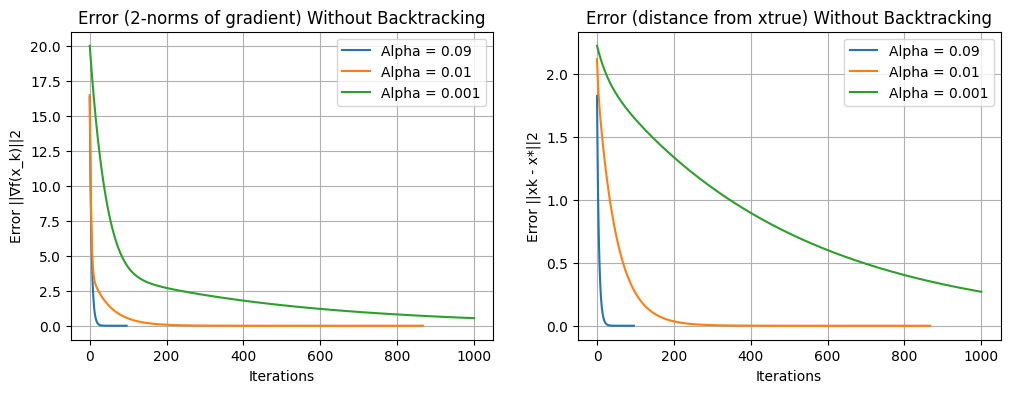


Iteration: 149, Solution: [1.         1.99999999], Error: 4.1703310731663155e-09


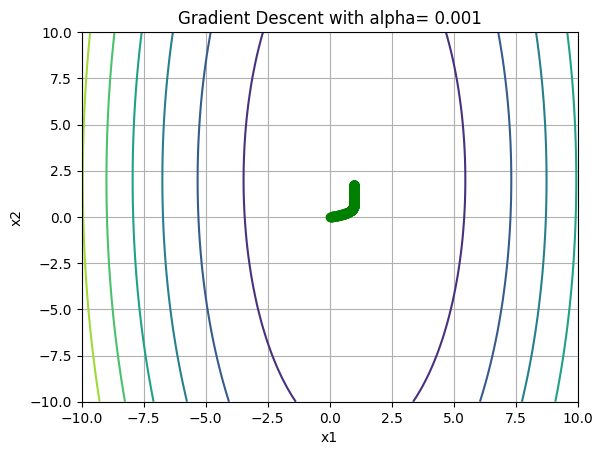

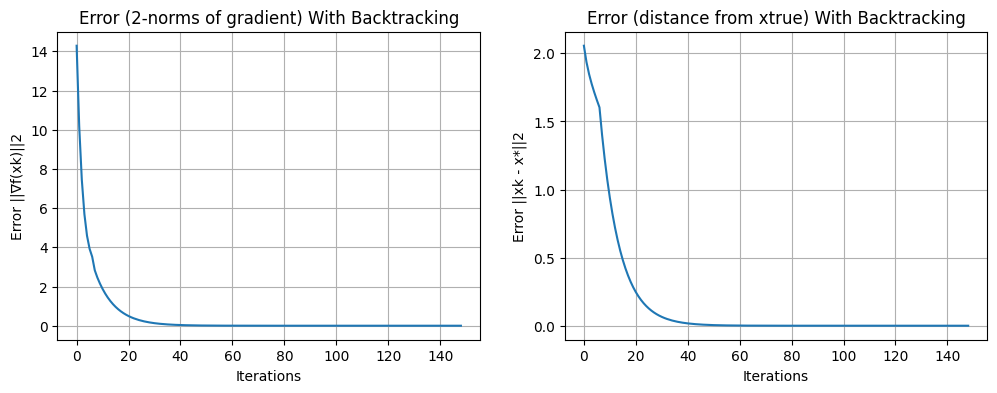

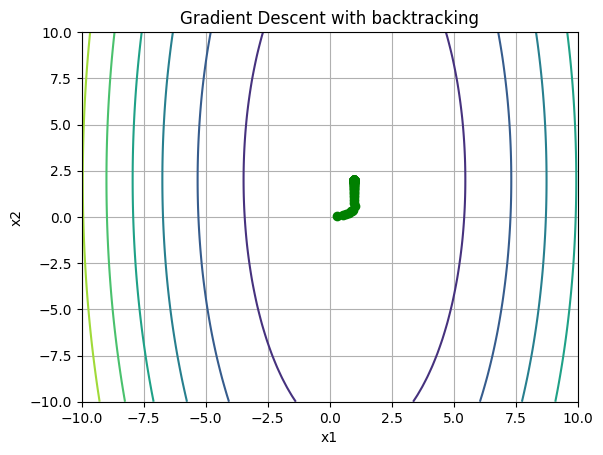

In [96]:
#FUNCTION 2 
def f(x):
    x1 = x[0]
    x2 = x[1]
    return (10*(x1 - 1)**2 + (x2 - 2)**2)
def grad_f(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([20*(x1 - 1), 2*(x2 - 2)])

x0 = np.array([0, 0])
kmax = 1000 #try 100 and 1000
tolf = tolx = 1e-9
x_true = np.array([1, 2])

plt.figure(figsize=(12, 4))

#Without backtracking
for alpha in [0.09, 0.01, 0.001]:
    x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD(f, grad_f, x0, alpha, kmax, tolf, tolx, x_true)
    error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
    print(f"Alpha: {alpha}, Iteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")
    
    plt.subplot(1, 2, 1)
    plt.plot(range(k), errA_values, label=f"Alpha = {alpha}")
    plt.xlabel("Iterations")
    plt.ylabel("Error ||∇f(x_k)||2")
    plt.legend()
    plt.title("Error (2-norms of gradient) Without Backtracking")
    plt.grid(True)
     
    plt.subplot(1, 2, 2)   
    plt.plot(range(k), errR_values, label=f"Alpha = {alpha}") # plot the error ||xk − x_true||2 varying k when the true x_true is available
    plt.xlabel("Iterations")
    plt.ylabel("Error ||xk - x*||2")
    plt.title("Error (distance from xtrue) Without Backtracking")
    plt.legend()
    plt.grid(True)
plt.show()

plt_contour(x_sol_values, k, f_values, grad_values, errA_values, f, "Gradient Descent with alpha= " + str(alpha))

#With backtracking
x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD_backtracking(f, grad_f, x0, kmax, tolf, tolx, x_true)
error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
print(f"\nIteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(k), errA_values)
plt.xlabel("Iterations")
plt.ylabel("Error ||∇f(xk)||2")
plt.title("Error (2-norms of gradient) With Backtracking")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(k), errR_values) # plot the error ||xk − x_true||2 varying k when the true x_true is available
plt.xlabel("Iterations")
plt.ylabel("Error ||xk - x*||2")
plt.title("Error (distance from xtrue) With Backtracking")
plt.grid(True)

plt.show()

plt_contour(x_sol_values, k, f_values, grad_values, errA_values, f, "Gradient Descent with backtracking")

n = 5
Alpha: 0.1, Iteration: 406, Solution: [0.99984913 0.9975983  1.00669328 1.00182481 0.99372299], Error: 0.004320226047809489
Alpha: 0.01, Iteration: 1001, Solution: [0.99188101 1.02744005 1.01228024 0.99125365 0.97237114], Error: 0.01902383321096744
Alpha: 0.001, Iteration: 1001, Solution: [1.08433987 1.04313897 0.96678904 0.91274276 0.87432296], Error: 0.08183605255252965


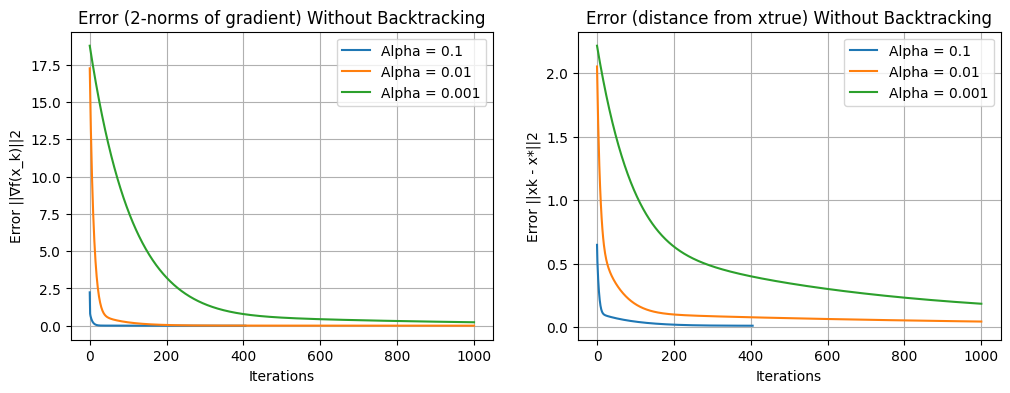


Iteration: 220, Solution: [0.99986644 0.99754739 1.00668386 1.00184486 0.99376336], Error: 0.0043129159261066285


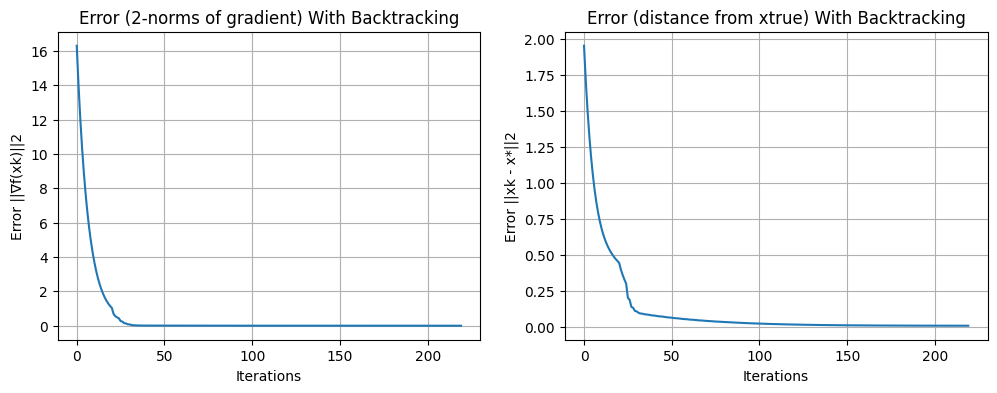

In [97]:
# FUNCTION 3

print("n = 5")
n = 5
v = np.linspace(0, 1, n)
A = np.vander(v, increasing=True)
x_true = np.ones((n,))
b = A @ x_true

def f(x):
    return 1/2*(np.linalg.norm(A @ x - b, 2)**2)

def grad_f(x): #AT(Ax−b)
    residual = (A @ x) - b
    gradient = A.T @ residual
    return gradient

x0 = np.zeros(n)
kmax = 1000 # try 100 and 1000
tolf = tolx = 1e-5

plt.figure(figsize=(12, 4))

#Without backtracking
for alpha in [0.1, 0.01, 0.001]:
    x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD(f, grad_f, x0, alpha, kmax, tolf, tolx, x_true)
    error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
    print(f"Alpha: {alpha}, Iteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")
    
    plt.subplot(1, 2, 1)
    plt.plot(range(k), errA_values, label=f"Alpha = {alpha}")
    plt.xlabel("Iterations")
    plt.ylabel("Error ||∇f(x_k)||2")
    plt.legend()
    plt.title("Error (2-norms of gradient) Without Backtracking")
    plt.grid(True)
     
    plt.subplot(1, 2, 2)   
    plt.plot(range(k), errR_values, label=f"Alpha = {alpha}") # plot the error ||xk − x_true||2 varying k when the true x_true is available
    plt.xlabel("Iterations")
    plt.ylabel("Error ||xk - x*||2")
    plt.title("Error (distance from xtrue) Without Backtracking")
    plt.legend()
    plt.grid(True)
plt.show()

#With backtracking
x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD_backtracking(f, grad_f, x0, kmax, tolf, tolx, x_true)
error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
print(f"\nIteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(k), errA_values)
plt.xlabel("Iterations")
plt.ylabel("Error ||∇f(xk)||2")
plt.title("Error (2-norms of gradient) With Backtracking")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(k), errR_values) # plot the error ||xk − x_true||2 varying k when the true x_true is available
plt.xlabel("Iterations")
plt.ylabel("Error ||xk - x*||2")
plt.title("Error (distance from xtrue) With Backtracking")
plt.grid(True)

plt.show()

n = 10
Alpha: 0.1, Iteration: 1001, Solution: [1.22590218e+16 8.09589441e+15 6.53440758e+15 5.64464367e+15
 5.06192010e+15 4.64859225e+15 4.34006803e+15 4.10148350e+15
 3.91214928e+15 3.75891626e+15], Error: 6345965422168255.0
Alpha: 0.01, Iteration: 1001, Solution: [1.00269113 0.98228937 1.00406863 1.0132289  1.01394742 1.01003665
 1.00381432 0.99660212 0.98914129 0.98184053], Error: 0.011320351222967217
Alpha: 0.001, Iteration: 1001, Solution: [0.95771764 1.07668812 1.07268604 1.04852636 1.02088224 0.99441348
 0.97043707 0.94918514 0.93051859 0.9141815 ], Error: 0.056056051358194484


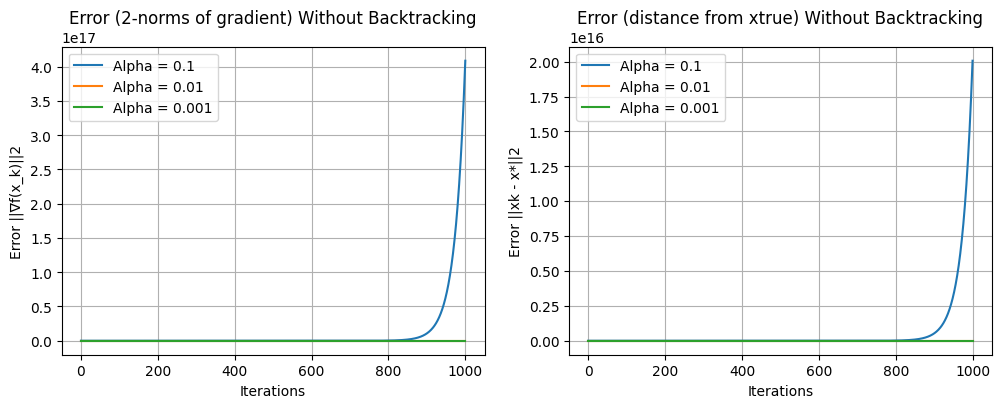


Iteration: 238, Solution: [1.00139132 0.99270965 0.99946408 1.005006   1.00689434 1.00592249
 1.00312342 0.99928516 0.99494083 0.99043356], Error: 0.005389050977153014


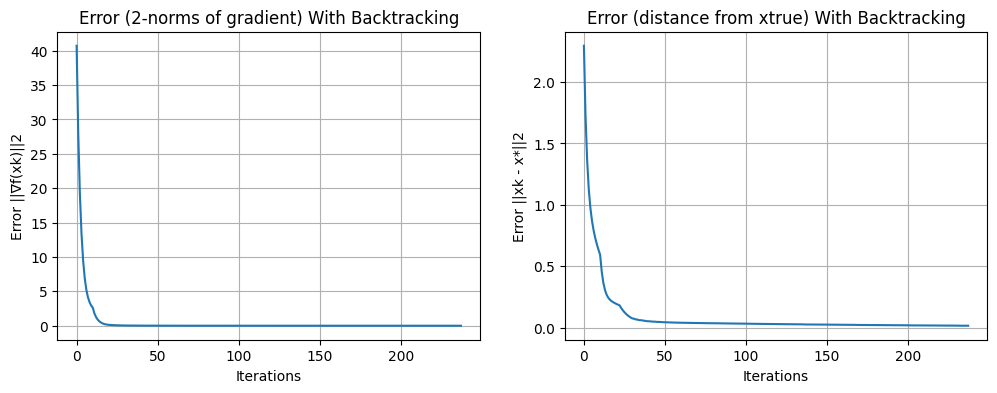

In [98]:
# FUNCTION 3

print("n = 10")
n = 10
v = np.linspace(0, 1, n)
A = np.vander(v, increasing=True)
x_true = np.ones((n,))
b = A @ x_true

def f(x):
    return 1/2*(np.linalg.norm(A @ x - b, 2)**2)

def grad_f(x): #AT(Ax−b)
    residual = (A @ x) - b
    gradient = A.T @ residual
    return gradient

x0 = np.zeros(n)
kmax = 1000 # try 100 and 1000
tolf = tolx = 1e-5

plt.figure(figsize=(12, 4))

#Without backtracking
for alpha in [0.1, 0.01, 0.001]:
    x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD(f, grad_f, x0, alpha, kmax, tolf, tolx, x_true)
    error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
    print(f"Alpha: {alpha}, Iteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")
    
    plt.subplot(1, 2, 1)
    plt.plot(range(k), errA_values, label=f"Alpha = {alpha}")
    plt.xlabel("Iterations")
    plt.ylabel("Error ||∇f(x_k)||2")
    plt.legend()
    plt.title("Error (2-norms of gradient) Without Backtracking")
    plt.grid(True)
     
    plt.subplot(1, 2, 2)   
    plt.plot(range(k), errR_values, label=f"Alpha = {alpha}") # plot the error ||xk − x_true||2 varying k when the true x_true is available
    plt.xlabel("Iterations")
    plt.ylabel("Error ||xk - x*||2")
    plt.title("Error (distance from xtrue) Without Backtracking")
    plt.legend()
    plt.grid(True)
plt.show()

#With backtracking
x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD_backtracking(f, grad_f, x0, kmax, tolf, tolx, x_true)
error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
print(f"\nIteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(k), errA_values)
plt.xlabel("Iterations")
plt.ylabel("Error ||∇f(xk)||2")
plt.title("Error (2-norms of gradient) With Backtracking")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(k), errR_values) # plot the error ||xk − x_true||2 varying k when the true x_true is available
plt.xlabel("Iterations")
plt.ylabel("Error ||xk - x*||2")
plt.title("Error (distance from xtrue) With Backtracking")
plt.grid(True)

plt.show()

n=1
l = 0.1
Alpha: 0.1, Iteration: 81, Solution: [0.9090186], Error: 0.09098140082443329
Alpha: 0.01, Iteration: 626, Solution: [0.9081966], Error: 0.09180339631229639
Alpha: 0.001, Iteration: 1001, Solution: [0.60699666], Error: 0.39300333937503007


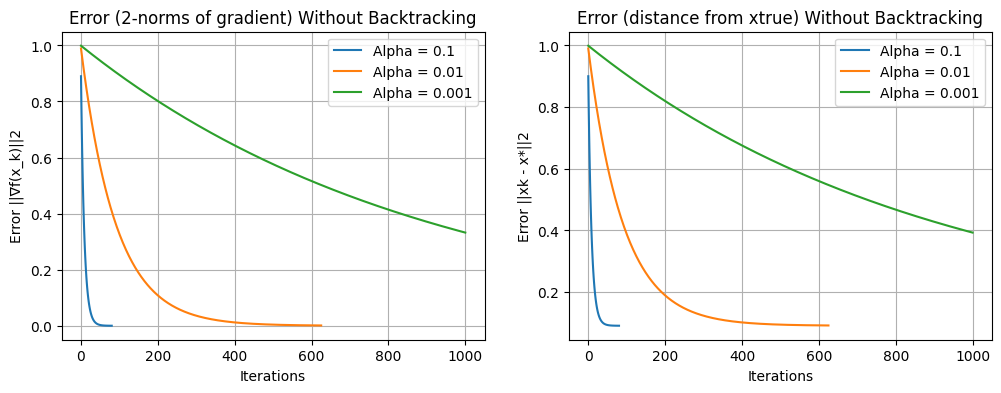


Iteration: 33, Solution: [0.90906853], Error: 0.09093146583117662


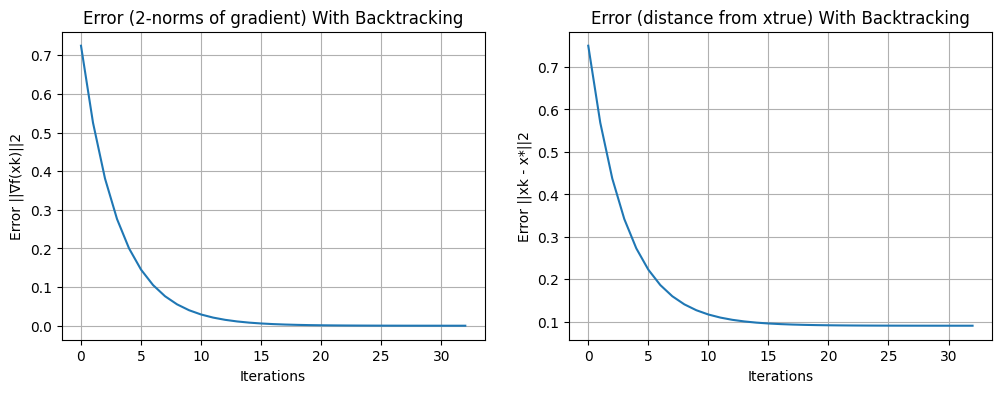

In [99]:
#FUNCTION 4
import random

print("n=1")
n = 1
v = np.linspace(0, 1, n)
A = np.vander(v, increasing=True)
x_true = np.ones((n,))
b = A @ x_true
l = random.random() #fixed values between [0, 1] 
l=0.1
print(f"l = {l}")

def f(x):
    return 0.5*np.linalg.norm(A @ x - b, 2)**2 + l/2*np.linalg.norm(x, 2)**2

def grad_f(x): #AT(Ax-b)
    residual = (A @ x) - b
    gradient = A.T @ residual + l * x
    return gradient

x0 = np.zeros(n)
kmax = 1000 # try 100 and 1000
tolf = tolx = 1e-5

plt.figure(figsize=(12, 4))

#Without backtracking
for alpha in [0.1, 0.01, 0.001]:
    x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD(f, grad_f, x0, alpha, kmax, tolf, tolx, x_true)
    error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
    print(f"Alpha: {alpha}, Iteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")
    
    plt.subplot(1, 2, 1)
    plt.plot(range(k), errA_values, label=f"Alpha = {alpha}")
    plt.xlabel("Iterations")
    plt.ylabel("Error ||∇f(x_k)||2")
    plt.legend()
    plt.title("Error (2-norms of gradient) Without Backtracking")
    plt.grid(True)
     
    plt.subplot(1, 2, 2)   
    plt.plot(range(k), errR_values, label=f"Alpha = {alpha}") # plot the error ||xk − x_true||2 varying k when the true x_true is available
    plt.xlabel("Iterations")
    plt.ylabel("Error ||xk - x*||2")
    plt.title("Error (distance from xtrue) Without Backtracking")
    plt.legend()
    plt.grid(True)

plt.show()

#With backtracking
x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD_backtracking(f, grad_f, x0, kmax, tolf, tolx, x_true)
error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
print(f"\nIteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(k), errA_values)
plt.xlabel("Iterations")
plt.ylabel("Error ||∇f(xk)||2")
plt.title("Error (2-norms of gradient) With Backtracking")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(k), errR_values) # plot the error ||xk − x_true||2 varying k when the true x_true is available
plt.xlabel("Iterations")
plt.ylabel("Error ||xk - x*||2")
plt.title("Error (distance from xtrue) With Backtracking")
plt.grid(True)

plt.show()

n=5
l = 0.9329663583443206
Alpha: 0.1, Iteration: 38, Solution: [1.02527832 0.93101057 0.85326025 0.80120521 0.76516346], Error: 0.15594784907684553
Alpha: 0.01, Iteration: 289, Solution: [1.0254194  0.93123185 0.85319833 0.80097632 0.76483034], Error: 0.15610325151208346
Alpha: 0.001, Iteration: 1001, Solution: [1.05005073 0.92632185 0.84071849 0.78508261 0.7471757 ], Error: 0.16935982876105798


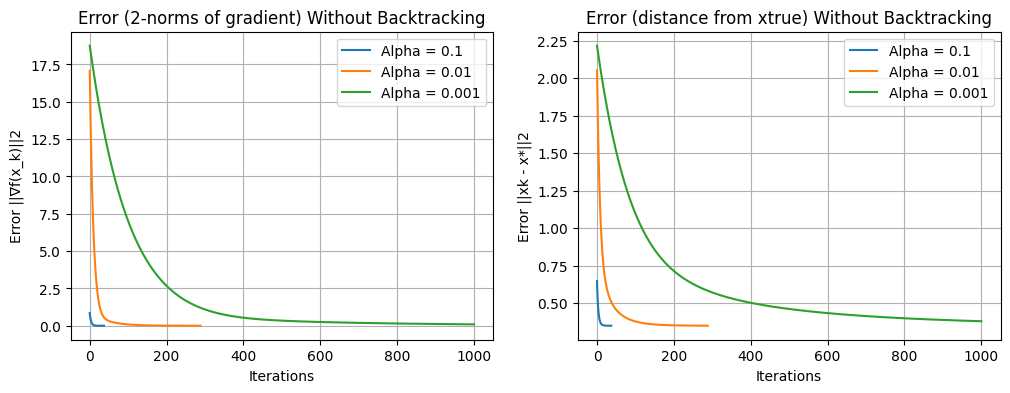


Iteration: 68, Solution: [1.02527659 0.93101346 0.85326122 0.8012049  0.76516231], Error: 0.1559477775605739


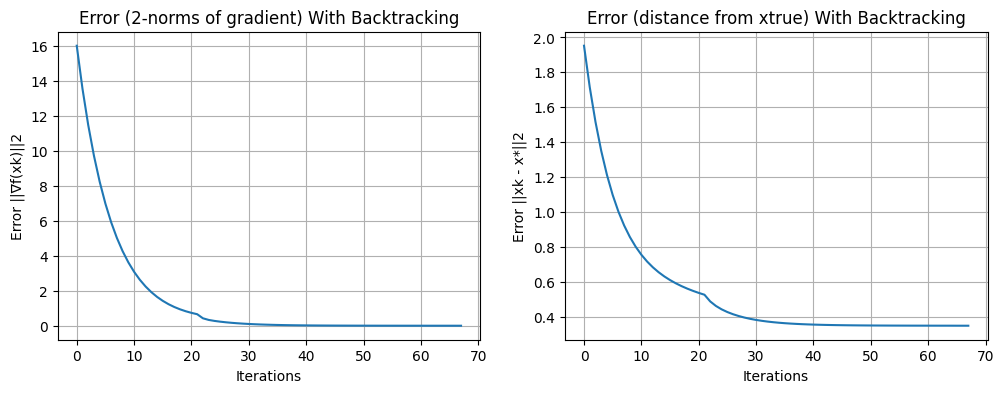

In [100]:
#FUNCTION 4
import random

print("n=5")
n = 5
v = np.linspace(0, 1, n)
A = np.vander(v, increasing=True)
x_true = np.ones((n,))
b = A @ x_true
l = random.random() #fixed values between [0, 1] 
print(f"l = {l}")

def f(x):
    return 0.5*np.linalg.norm(A @ x - b, 2)**2 + l/2*np.linalg.norm(x, 2)**2

def grad_f(x): #AT(Ax-b)
    residual = (A @ x) - b
    gradient = A.T @ residual + l * x
    return gradient

x0 = np.zeros(n)
kmax = 1000 # try 100 and 1000
tolf = tolx = 1e-5

plt.figure(figsize=(12, 4))

#Without backtracking
for alpha in [0.1, 0.01, 0.001]:
    x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD(f, grad_f, x0, alpha, kmax, tolf, tolx, x_true)
    error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
    print(f"Alpha: {alpha}, Iteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")
    
    plt.subplot(1, 2, 1)
    plt.plot(range(k), errA_values, label=f"Alpha = {alpha}")
    plt.xlabel("Iterations")
    plt.ylabel("Error ||∇f(x_k)||2")
    plt.legend()
    plt.title("Error (2-norms of gradient) Without Backtracking")
    plt.grid(True)
     
    plt.subplot(1, 2, 2)   
    plt.plot(range(k), errR_values, label=f"Alpha = {alpha}") # plot the error ||xk − x_true||2 varying k when the true x_true is available
    plt.xlabel("Iterations")
    plt.ylabel("Error ||xk - x*||2")
    plt.title("Error (distance from xtrue) Without Backtracking")
    plt.legend()
    plt.grid(True)

plt.show()

#With backtracking
x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD_backtracking(f, grad_f, x0, kmax, tolf, tolx, x_true)
error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
print(f"\nIteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(k), errA_values)
plt.xlabel("Iterations")
plt.ylabel("Error ||∇f(xk)||2")
plt.title("Error (2-norms of gradient) With Backtracking")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(k), errR_values) # plot the error ||xk − x_true||2 varying k when the true x_true is available
plt.xlabel("Iterations")
plt.ylabel("Error ||xk - x*||2")
plt.title("Error (distance from xtrue) With Backtracking")
plt.grid(True)

plt.show()

In [101]:
def my_plot_2D(xk_vals, k, f_vals, grad_valks, err_vals, f, title):
    x_vals = np.linspace(-3, 3, 100)
    y_vals = []
    for x in x_vals:
        y_vals.append(f(x))
    plt.plot(x_vals, y_vals)
    plt.scatter(xk_vals, f_vals, c='green')
    plt.title(title)

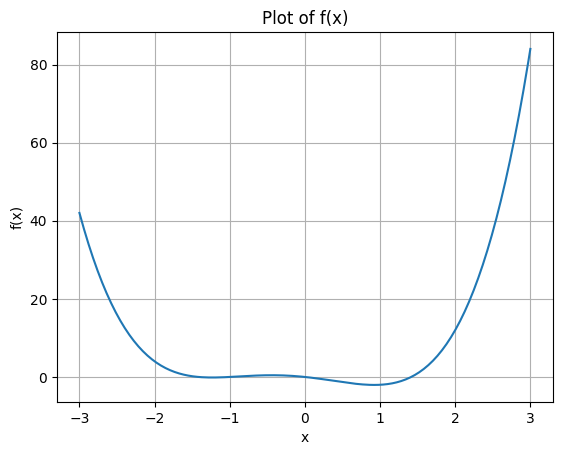

Alpha: 0.1, x0: -1, Iteration: 11, Solution: -1.2322368229753748
Alpha: 0.01, x0: -1, Iteration: 113, Solution: -1.2321078834970505
Alpha: 0.001, x0: -1, Iteration: 811, Solution: -1.2307850520802697


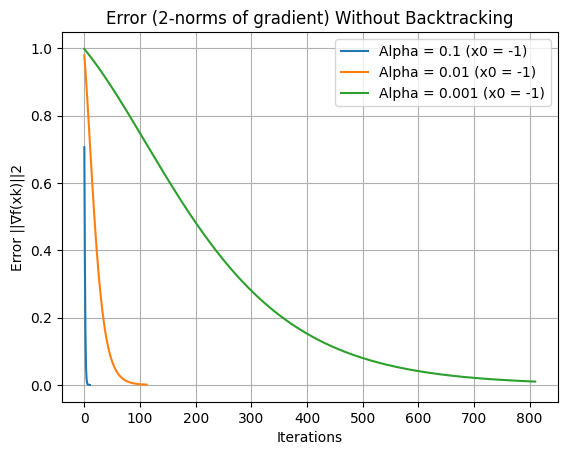

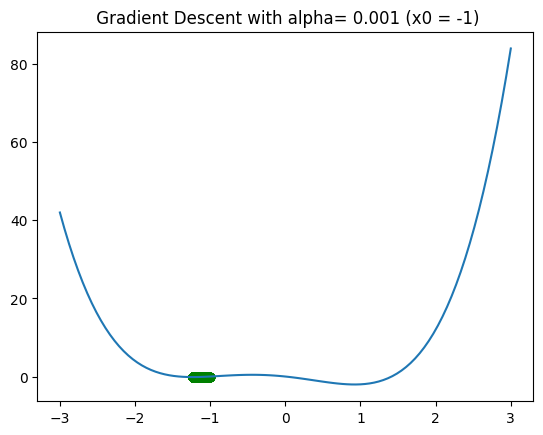


Iteration: 54, Solution: -1.2321590180202115


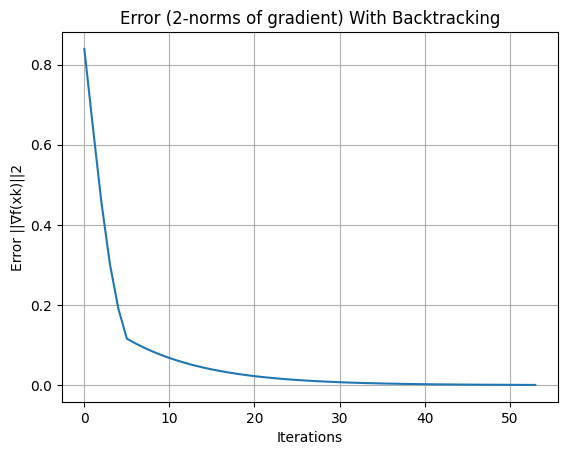

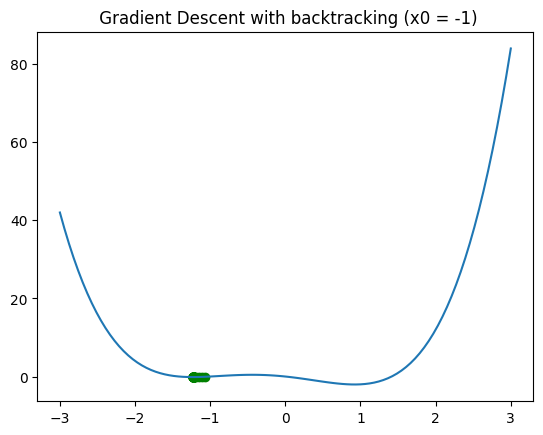

Alpha: 0.1, x0: 0, Iteration: 9, Solution: 0.9222263966908124
Alpha: 0.01, x0: 0, Iteration: 95, Solution: 0.9221561972760987
Alpha: 0.001, x0: 0, Iteration: 774, Solution: 0.9213887683969288


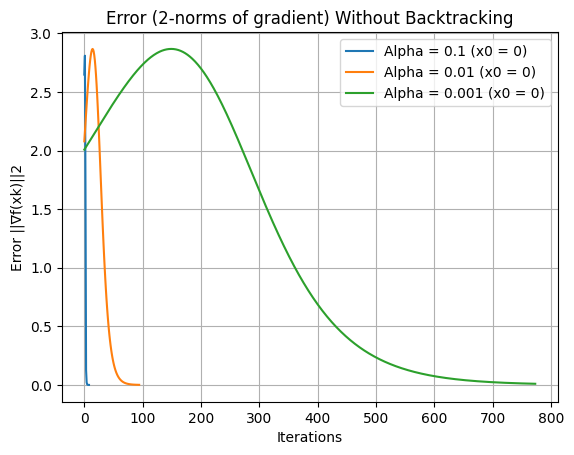

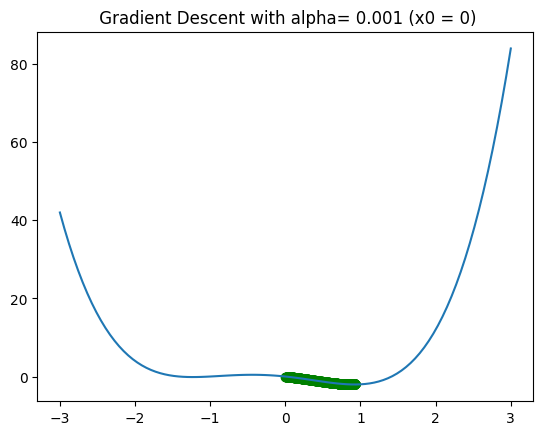


Iteration: 47, Solution: 0.9221833168070763


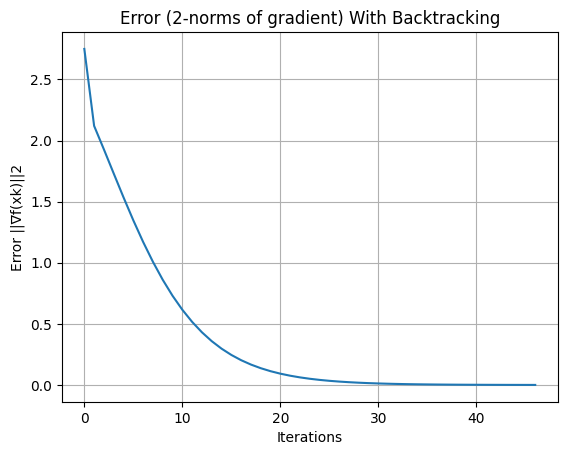

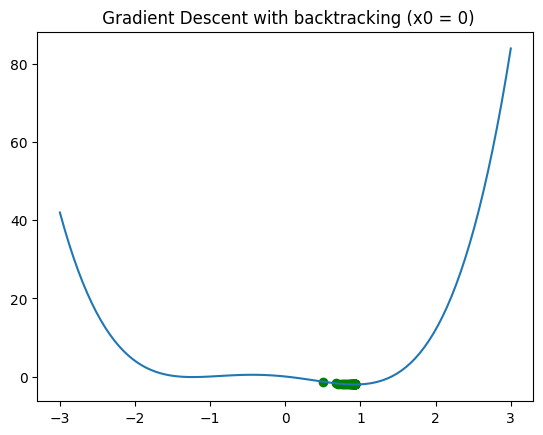

In [102]:
# FUNCTION 5

def GD(f, grad_f, x0, alpha, kmax, tolf, tolx):
    xold = x0
    k=0
    conditions = True

    x_values = []  # Store x_k values
    f_values = []  # Store f(x_k) values
    grad_values = []  # Store grad_f(x_k) values
    err_values = []  # Store ||grad_f(x_k)||_2 values
    
    while conditions:
        x = xold - alpha * grad_f(xold)

        x_values.append(x)
        f_values.append(f(x))
        grad_values.append(grad_f(x))
        err_values.append(np.abs(grad_f(x)))
        
        condition1 = np.abs(grad_f(x)) > tolf*np.abs(grad_f(x0))
        condition2 =  np.abs(x-xold) > tolx
        condition3 = k < kmax
        conditions = condition1 & condition2 & condition3
        
        k +=1
        xold = x
    return x_values, k, f_values, grad_values, err_values
    
def backtracking(f, grad_f, x):
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.abs(grad_f(x)) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-5:
            print("alpha too small")
            break
    return alpha

def GD_backtracking(f, grad_f, x0, kmax, tolf, tolx):
    xold = x0
    k = 0
    conditions = True
    
    x_values = []  # Store x_k values
    f_values = []  # Store f(x_k) values
    grad_values = []  # Store grad_f(x_k) values
    err_values = []  # Store ||grad_f(x_k)||_2 values
    
    while conditions:
        alpha = backtracking(f, grad_f, xold)
        x = xold - alpha * grad_f(xold)

        x_values.append(x)
        f_values.append(f(x))
        grad_values.append(grad_f(x))
        err_values.append(np.abs(grad_f(x)))
        
        condition1 = np.abs(grad_f(x)) > tolf*np.abs(grad_f(x0))
        condition2 =  np.abs(x-xold) > tolx
        condition3 = k < kmax
        conditions = condition1 and condition2 and condition3
        
        k += 1
        xold = x
    return x_values, k, f_values, grad_values, err_values
    
def f(x):
    return x**4+x**3-2*x**2-2*x # Non convex function

x = np.linspace(-3, 3, 200)
y = f(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x)')
plt.grid(True)
plt.show()

def grad_f(x):
    return 4*(x**3)+3*(x**2)-4*x-2

kmax = 1000 # try 100 and 1000
tolf = tolx = 1e-5

for x0 in [-1, 0]:
    #Without backtracking
    for alpha in [0.1, 0.01, 0.001]:
        x_sol_values, k, f_values, grad_values, err_values = GD(f, grad_f, x0, alpha, kmax, tolf, tolx)
        print(f"Alpha: {alpha}, x0: {x0}, Iteration: {k}, Solution: {x_sol_values[-1]}")
        plt.plot(range(k), err_values, label=f"Alpha = {alpha} (x0 = {x0})")
    plt.xlabel("Iterations")
    plt.ylabel("Error ||∇f(xk)||2")
    plt.title("Error (2-norms of gradient) Without Backtracking")
    plt.legend()
    plt.grid(True)
    
    plt.show()

    my_plot_2D(x_sol_values, k, f_values, grad_values, err_values, f, " Gradient Descent with alpha= " + str(alpha) + " (x0 = " + str(x0) + ")")
    plt.show()
    
    #With backtracking
    x_sol_values, k, f_values, grad_values, err_values = GD_backtracking(f, grad_f, x0, kmax, tolf, tolx)
    print(f"\nIteration: {k}, Solution: {x_sol_values[-1]}")
    
    plt.plot(range(k), err_values)
    plt.xlabel("Iterations")
    plt.ylabel("Error ||∇f(xk)||2")
    plt.title("Error (2-norms of gradient) With Backtracking")
    plt.grid(True)

    plt.show()

    my_plot_2D(x_sol_values, k, f_values, grad_values, err_values, f, " Gradient Descent with backtracking (x0 = " + str(x0) + ")")
    plt.show()

<h1>Stochastic gradient discent</h1>

In [103]:
# Utils

def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

def f(w, xhat):
    return sigmoid(xhat.T @ w)

def grad_f(w, xhat):
    return (sigmoid(xhat.T @ w) * (1 - sigmoid(xhat.T @ w)) * xhat.T)

def MSE(f_w_x, y):
    return np.linalg.norm((f_w_x-y))**2

def grad_MSE(grad_f_w_x, f_w_x, y):
    return grad_f_w_x.T * (f_w_x - y)

def ell(w, X, Y):
    d, N = X.shape

    mse_sum = 0
    for i in range(0, N):
        mse_sum+=MSE(f(w, X[:, i]), Y[i])

    return mse_sum / N

def grad_ell(w, X, Y):
    d, N = X.shape

    grad_mse_sum = 0
    for i in range(0, N):
        grad_mse_sum += grad_MSE(np.array(grad_f(w, X[:, i])), f(w, X[:, i]), Y[i])

    return grad_mse_sum / N


In [104]:
def x_split(X, Y, N_train):
    d, N = X.shape

    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:N_train]
    test_idx = idx[N_train:]

    Xtrain = X[:, train_idx]
    Ytrain = Y[train_idx]

    Xtest = X[:, test_idx]
    Ytest = Y[test_idx]

    return Xtrain, Xtest, Ytrain, Ytest

def get_digits(X, Y, chosen_numbers):
    I = [idx for idx, elem in enumerate(Y) if elem in chosen_numbers]
    X_def = X[:, I]
    Y_def = Y[I]
    
    return X_def, Y_def

In [105]:
def SGD(l, grad_l, w0, D, batch_size, n_epochs):
    alpha = 1e-3


    X, Y = D
    X_backup = X
    Y_backup = Y
    d, N = X.shape

    Xhat = np.concatenate((np.ones((1,N)), X), axis=0)

    n_batch_per_epoch = N // batch_size
    w_vals = [w0]
    f_vals = [l(w0, Xhat, Y)]
    grad_f_vals = [grad_l(w0, Xhat, Y)]
    err_vals = [np.linalg.norm(grad_l(w0, Xhat, Y))]

    for epoch in range(n_epochs):
        idx = np.arange(N)
        np.random.shuffle(idx)

        for k in range(n_batch_per_epoch):
            batch_indices = idx[k * batch_size : (k + 1) * batch_size]

            Mx = Xhat[:, batch_indices]
            My = Y[batch_indices]
            M = (Mx, My)


            w = w0 - alpha * grad_l(w0, Mx, My)
            w_vals.append(w)

            w0 = w

        X = X_backup
        Y = Y_backup
        f_vals.append(l(w, Xhat, Y))
        grad_f_vals.append(grad_l(w, Xhat, Y))
        err_vals.append(np.linalg.norm(grad_l(w, Xhat, Y)))
    
    return w, f_vals, grad_f_vals, err_vals


In [106]:
import pandas as pd

In [107]:
data = pd.read_csv("./data.csv")
data = np.array(data)

In [108]:
X = data[:, 1:].T
Y = data[:, 0]

chosen_digits = [7, 8]

In [109]:
X_set, Y_set = get_digits(X, Y, chosen_digits)

In [110]:
d, N = X_set.shape
N_train = int(N/3*2)
Y_set[Y_set == chosen_digits[0]] = 0
Y_set[Y_set == chosen_digits[1]] = 1

X_train, X_test, Y_train, Y_test = x_split(X_set, Y_set, N_train)

D = (X_train, Y_train)

In [111]:
d, N = X_train.shape
w0 = np.random.normal(0, 0.1, d+1)
batch_size = 15
n_epochs = 50
w, f_vals, grad_vals, err_vals = SGD(ell, grad_ell, w0, D, batch_size, n_epochs)

C:\Users\luigi\AppData\Local\Temp\ipykernel_10016\718066766.py:4: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-z)))


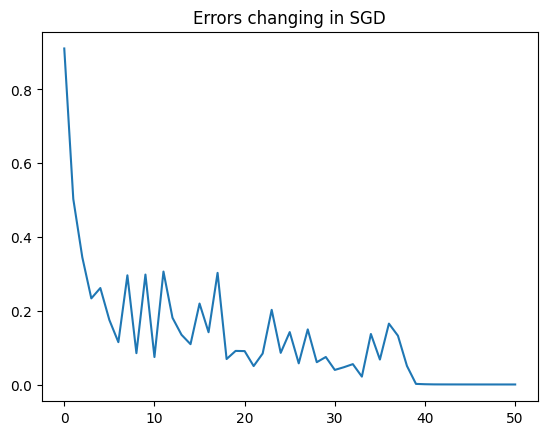

In [112]:
x_plot = np.arange(n_epochs+1)
plt.plot(x_plot, err_vals)
plt.title("Errors changing in SGD")
plt.show()

In [113]:
def acc(app, Y, chosen_indeces):
    tot = 0
    for i in range(len(Y)):
        if (int(app[i]) == Y[i]):
            tot+=1
    return tot, tot/len(Y)

def predict(w, X, threshold = 0.5):
    d, N = X.shape
    app = np.zeros(N)
    for i in range(N):
        result = f(w, X[:, i])
        if (result >= threshold):
            app[i] = 1
        else:
            app[i] = 0
    return app

In [114]:
Xt = X_train.copy()
Yt = Y_train.copy()

d, N = Xt.shape
Xthat = np.concatenate((np.ones((1,N)), Xt), axis=0)
app = predict(w, Xthat)
tot, avg = acc(app, Yt, chosen_digits)
print("Matches on Train Set:", int(tot))
print("Total entries on Train Set:", int(Yt.shape[0]))
print("Accuracy on Train Set:", round(avg*100, 2))

Xt = X_test.copy()
Yt = Y_test.copy()

d, N = Xt.shape
Xthat = np.concatenate((np.ones((1,N)), Xt), axis=0)
app = predict(w, Xthat)
tot, avg = acc(app, Yt, chosen_digits)
print("Matches on Test Set:", int(tot))
print("Total entries on Test Set:", int(Yt.shape[0]))
print("Accuracy on Test Set:", round(avg*100, 2))

Matches on Train Set: 5541
Total entries on Train Set: 5642
Accuracy on Train Set: 98.21
Matches on Test Set: 2764
Total entries on Test Set: 2822
Accuracy on Test Set: 97.94


C:\Users\luigi\AppData\Local\Temp\ipykernel_10016\718066766.py:4: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-z)))


In [115]:
def GD_2(l, grad_l, w0, D, tolf = 1e-9, tolx= 1e-9, kmax = 50, alpha = 1e-1):
    X, Y = D
    d, N = X.shape

    Xhat = np.concatenate((np.ones((1,N)), X), axis=0)
    
    w_vals = [w0]
    f_vals = [l(w0, Xhat, Y)]
    grad_f_vals = [grad_l(w0, Xhat, Y)]
    err_vals = [np.linalg.norm(grad_l(w0, Xhat, Y))]

    iterations = 0

    while iterations < kmax:
        w = w_vals[-1] - alpha * grad_l(w_vals[-1], Xhat, Y)

        w_vals.append(w)
        f_vals.append(l(w, Xhat, Y))
        grad_f_vals.append(grad_l(w, Xhat, Y))
        err_vals.append(np.linalg.norm(grad_l(w, Xhat, Y)))

        iterations+=1

        if err_vals[-1] < tolf * err_vals[0]:
            break

        if np.linalg.norm(w_vals[-1] - w_vals[-2]) < tolx * np.linalg.norm(w_vals[0]):
            break

    return (w, f_vals, grad_f_vals, err_vals, iterations)
    

In [116]:
w_gd, f_vals_gd, grad_vals_gd, err_vals_gd, iterations_gd = GD_2(ell, grad_ell, w0, D)

C:\Users\luigi\AppData\Local\Temp\ipykernel_10016\718066766.py:4: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-z)))


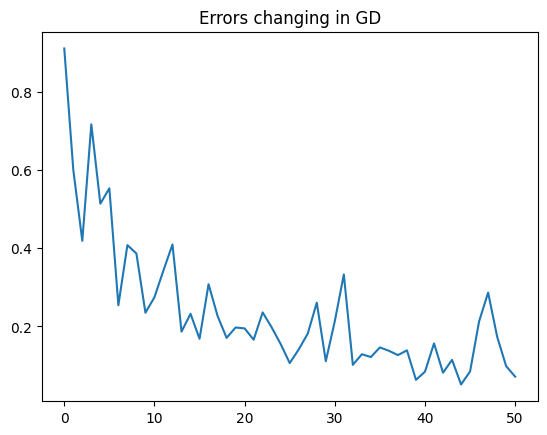

In [117]:
x_plot = np.arange(len(err_vals_gd))
plt.plot(x_plot, err_vals_gd)
plt.title("Errors changing in GD")
plt.show()

In [118]:
Xt = X_train.copy()
Yt = Y_train.copy()

d, N = Xt.shape
Xthat = np.concatenate((np.ones((1,N)), Xt), axis=0)
app = predict(w_gd, Xthat)
tot, avg = acc(app, Yt, chosen_digits)
print("Matches on Train Set:", int(tot))
print("Total entries on Train Set:", int(Yt.shape[0]))
print("Accuracy on Train Set:", round(avg*100, 2))

Xt = X_test.copy()
Yt = Y_test.copy()

d, N = Xt.shape
Xthat = np.concatenate((np.ones((1,N)), Xt), axis=0)
app = predict(w_gd, Xthat)
tot, avg = acc(app, Yt, chosen_digits)
print("Matches on Test Set:", int(tot))
print("Total entries on Test Set:", int(Yt.shape[0]))
print("Accuracy on Test Set:", round(avg*100, 2))

Matches on Train Set: 5475
Total entries on Train Set: 5642
Accuracy on Train Set: 97.04
Matches on Test Set: 2740
Total entries on Test Set: 2822
Accuracy on Test Set: 97.09


C:\Users\luigi\AppData\Local\Temp\ipykernel_10016\718066766.py:4: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-z)))


In [119]:
X = data[:, 1:].T
Y = data[:, 0]

chosen_digits = [8, 7]

In [120]:
X_set, Y_set = get_digits(X, Y, chosen_digits)

In [121]:
d, N = X_set.shape
N_train = int(N/4*3)
Y_set[Y_set == chosen_digits[0]] = 0
Y_set[Y_set == chosen_digits[1]] = 1

X_train, X_test, Y_train, Y_test = x_split(X_set, Y_set, N_train)

D = (X_train, Y_train)

In [122]:
d, N = X_train.shape
w0 = np.random.normal(0, 0.1, d+1)
batch_size = 15
n_epochs = 50
w, f_vals, grad_vals, err_vals = SGD(ell, grad_ell, w0, D, batch_size, n_epochs)

C:\Users\luigi\AppData\Local\Temp\ipykernel_10016\718066766.py:4: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-z)))


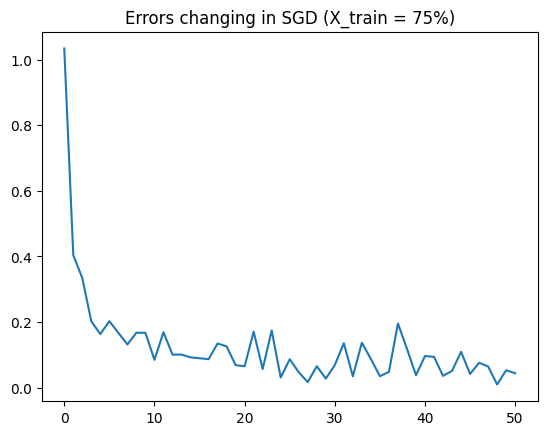

In [123]:
x_plot = np.arange(n_epochs+1)
plt.plot(x_plot, err_vals)
plt.title("Errors changing in SGD (X_train = 75%)")
plt.show()

In [124]:
Xt = X_train.copy()
Yt = Y_train.copy()

d, N = Xt.shape
Xthat = np.concatenate((np.ones((1,N)), Xt), axis=0)
app = predict(w, Xthat)
tot, avg = acc(app, Yt, chosen_digits)
print("Matches on Train Set:", int(tot))
print("Total entries on Train Set:", int(Yt.shape[0]))
print("Accuracy on Train Set:", round(avg*100, 2))

Xt = X_test.copy()
Yt = Y_test.copy()

d, N = Xt.shape
Xthat = np.concatenate((np.ones((1,N)), Xt), axis=0)
app = predict(w, Xthat)
tot, avg = acc(app, Yt, chosen_digits)
print("Matches on Test Set:", int(tot))
print("Total entries on Test Set:", int(Yt.shape[0]))
print("Accuracy on Test Set:", round(avg*100, 2))

Matches on Train Set: 6255
Total entries on Train Set: 6348
Accuracy on Train Set: 98.53
Matches on Test Set: 2074
Total entries on Test Set: 2116
Accuracy on Test Set: 98.02


C:\Users\luigi\AppData\Local\Temp\ipykernel_10016\718066766.py:4: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-z)))


In [125]:
w_gd, f_vals_gd, grad_vals_gd, err_vals_gd, iterations_gd = GD_2(ell, grad_ell, w0, D)

C:\Users\luigi\AppData\Local\Temp\ipykernel_10016\718066766.py:4: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-z)))


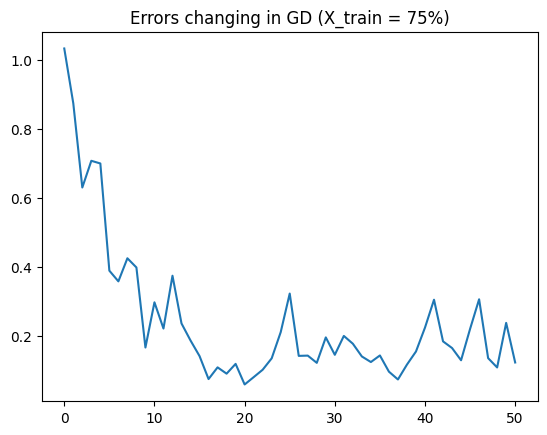

In [126]:
x_plot = np.arange(len(err_vals_gd))
plt.plot(x_plot, err_vals_gd)
plt.title("Errors changing in GD (X_train = 75%)")
plt.show()

In [127]:
Xt = X_train.copy()
Yt = Y_train.copy()

d, N = Xt.shape
Xthat = np.concatenate((np.ones((1,N)), Xt), axis=0)
app = predict(w_gd, Xthat)
tot, avg = acc(app, Yt, chosen_digits)
print("Matches on Train Set:", int(tot))
print("Total entries on Train Set:", int(Yt.shape[0]))
print("Accuracy on Train Set:", round(avg*100, 2))

Xt = X_test.copy()
Yt = Y_test.copy()

d, N = Xt.shape
Xthat = np.concatenate((np.ones((1,N)), Xt), axis=0)
app = predict(w_gd, Xthat)
tot, avg = acc(app, Yt, chosen_digits)
print("Matches on Test Set:", int(tot))
print("Total entries on Test Set:", int(Yt.shape[0]))
print("Accuracy on Test Set:", round(avg*100, 2))

Matches on Train Set: 6192
Total entries on Train Set: 6348
Accuracy on Train Set: 97.54
Matches on Test Set: 2061
Total entries on Test Set: 2116
Accuracy on Test Set: 97.4


C:\Users\luigi\AppData\Local\Temp\ipykernel_10016\718066766.py:4: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-z)))
